# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Hiab Berhane

Datum: 18.11

Gruppe: 02

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie sieht der logaritmische Graph aus bei dem Abkühlen und folg die Abkühlung dem Newtonsches Abkühlungsgesetz

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/Newton.JPG" width="800">
Ich habe Blaubere Tee gemacht und den Sensor für 10 Minuten reingetan und den anderen neben dran.

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path_experiment_newton='/home/jovyan/work/calorimetry_home/archiv/newton_experiment/newton_experiment.h5'

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

file=h5py.File(path_experiment_newton, 'r')
author = file.attrs["authors"]
created = file.attrs["created"]
experiment = file.attrs["experiment"]
group_number= file.attrs["group_number"]
    
keys = file['RawData'].keys()

temperature_sensor_1 = file['RawData']['sensors']['1ee83016-e13f-620f-baa5-40c3edeba894']['temperature'][()]
temperature_sensor_2 = file['RawData']['sensors']['1ee83018-8574-67a5-a64a-2eda8987157f']['temperature'][()]

timestamp_sensor_1 = file['RawData']['sensors']['1ee83016-e13f-620f-baa5-40c3edeba894']['timestamps'][()]
timestamp_sensor_2 = file['RawData']['sensors']['1ee83018-8574-67a5-a64a-2eda8987157f']['timestamps'][()]


file.close()


print(temperature_sensor_1)
print(temperature_sensor_2)

#diese Zeile ist dafür da, weil die Temperaturen beim Messen unterschiedliche Längen hatten simit passe ich die Länge an
temperature_sensor_2=np.append(temperature_sensor_2, 23.125)
# DONE #

[62.9375 63.125  63.125  63.125  63.125  63.6875 63.75   63.875  64.
 64.     64.125  64.1875 64.25   64.25   64.3125 64.3125 64.3125 64.3125
 64.3125 64.3125 64.3125 64.3125 64.3125 64.25   64.25   64.25   64.25
 64.25   64.25   64.25   64.25   64.25   64.25   64.25   64.0625 64.0625
 64.     64.     63.9375 63.9375 63.9375 63.9375 63.875  63.8125 63.8125
 63.75   63.75   63.75   63.75   63.625  63.625  63.5625 63.5625 63.5625
 63.5625 63.5625 63.4375 63.4375 63.375  63.3125 63.3125 63.3125 63.3125
 63.3125 63.3125 63.3125 63.3125 63.125  63.125  63.125  63.0625 63.0625
 63.0625 63.     63.     63.     62.875  62.875  62.8125 62.8125 62.8125
 62.75   62.75   62.75   62.6875 62.6875 62.6875 62.625  62.625  62.5625
 62.5625 62.5625 62.5    62.5    62.4375 62.4375 62.4375 62.375  62.375
 62.375  62.375  62.25   62.25   62.1875 62.1875 62.1875 62.125  62.125
 62.0625 62.0625 62.0625 62.0625 61.9375 61.9375 61.9375 61.875  61.875
 61.8125 61.75   61.75   61.6875 61.6875 61.625  61.625  61.

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


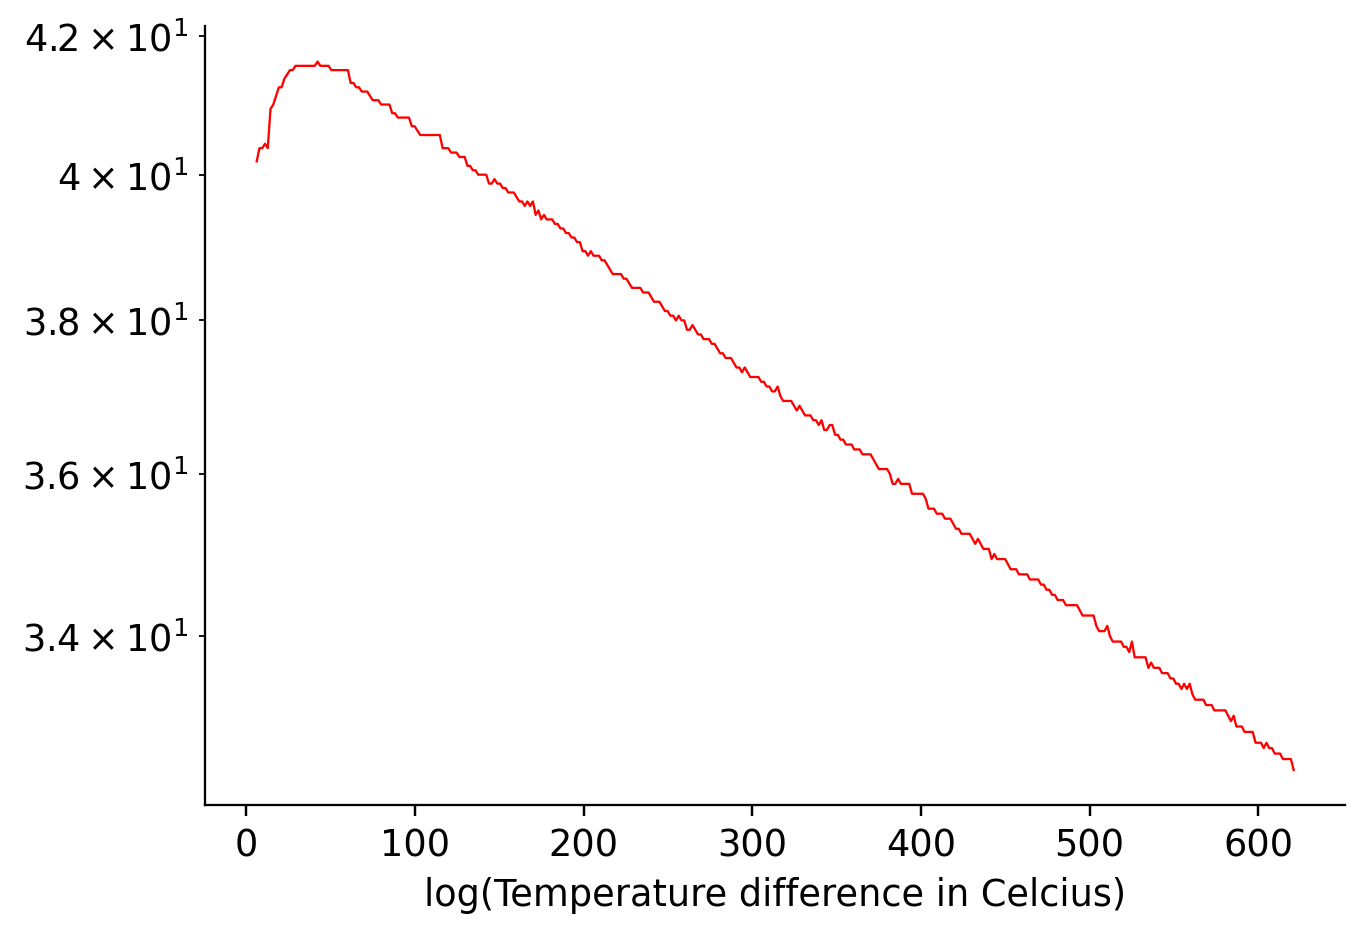

In [4]:
# TODO: Use the temperature and time data for plotting
temperature_difference = temperature_sensor_1 - temperature_sensor_2

fig, ax = plt.subplots()
ax.plot(timestamp_sensor_1, temperature_difference , color='red')
ax.set_xlabel("log(Temperature difference in Celcius)")
ax.set_yscale("log")

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [5]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
temperature_1=max(temperature_sensor_1)
temperature_2=temperature_sensor_1[-1]
T_diff=temperature_difference

alpha, beta=np.polyfit(timestamp_sensor_1, np.log(T_diff),1)
K=beta
# DONE #

#### (iV) Ergebnis

In [6]:
# TODO: Print result
print(K)
# DONE #

3.7443271519045274


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Der logaritmische Graph ist anhärend linear was auf einen exponentiellen Verlauf hindeutet,außerdem ist die Abkülung proportional zur Temperaturdifferenz. Das Newtonsche Abkühlungsgesetzt ist somit bestätigt und meine Forschungsfrage kann mit ja beantwortet werden

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Im gegensatz zu dem ersten Versuch ist die die Anzahl der Fehler die machen kann nicht so hoch da man nicht viel machen muss, außerdem kann man das Newtonsche Abkühlunggesetzt hier am Tee gut im Alltag benutzen.